<a href="https://colab.research.google.com/github/CoWoGeo/PUS2022_CWolk/blob/main/ProjectLanthamWolk/JunkyardFireModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
!apt install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg

In [3]:
! pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install cartoframes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 245 kB 6.6 MB/s 
     |████████████████████████████████| 1.1 MB 42.3 MB/s 
     |████████████████████████████████| 235 kB 52.1 MB/s 
     |████████████████████████████████| 7.8 MB 30.2 MB/s 
     |████████████████████████████████| 16.6 MB 19.6 MB/s 
  Created wheel for carto: filename=carto-1.11.3-py3-none-any.whl size=35088 sha256=f65fccbff0b7b7afc4cbe98d1a5531ca699b425e73b62417510ee639593861f5
  Stored in directory: /root/.cache/pip/wheels/6b/a3/41/90fa4334cd280f91d17226f36db7a34b12902f7e5b281afb84
  Created wheel for pyrestcli: filename=pyrestcli-0.6.11-py3-none-any.whl size=8496 sha256=01df463714511bc7185c6a6cd6aaae8c55de4c9847ba6e1597c92de9a0cdfbef
  Stored in directory: /root/.cache/pip/wheels/92/fc/98/2e46573b8e1bbe953345578314c765d3ecdc9532450bb90d79
Successfully built carto pyrestcli


In [5]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import cartoframes as cf
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

# Importing the Data for Our Model

## Data we want to end up with:

*   Fire yes/no (our target variable)

### Geographic and Parcel Data
*   Parcel (our object)
*   Fire yes/no (our target variable)
*   Geography (for mapping)
*   Map section (one-hot encoded)
*   Zip code (one-hot encoded)
*   If parcel is under Dept of Revenue review (n/a, completed, in progress, one-hot encoded)
*   If parcel is under Philadelphia Water Dept review (n/a, completed, in progress, one-hot encoded)

### Philadelphia Business Licenses at Parcel
*   Number of business licenses (numeric)
*   Type of business licenses (one-hot encoded)

### L&I Violations at Parcel
*   Number of violations (numeric)
*   Responsible agency for violation (one-hot encoded)
*   Violation case priority (one-hot encoded)

### DEP Water Permit Data (does not exist for all locations)



### DEP Water Permit Data

## Junkyard Business Licenses - All

In [7]:
licenses = gpd.GeoDataFrame.from_file("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/PhillyBusinessLicensesOHE.geojson")

In [18]:
licenses.head()

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,zip_19153-3506,zip_19153-3507,zip_19153-3508,zip_19153-3513,zip_19153-3516,zip_19153-3522,zip_19153-3524,zip_19153-3529,zip_19153-3588,geometry
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2679160.849 219790.732, 2679137.703 ..."
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2678435.960 218926.501, 2678379.218 ..."
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2679159.954 219790.563, 2679136.835 ..."
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2680829.298 223301.310, 2680808.700 ..."
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2680825.903 223299.337, 2680819.922 ..."


In [155]:
licenses.crs

<Derived Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Locations as Key

In [102]:
junklocations = licenses[["parcel_full"]]

In [103]:
junklocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   parcel_full  168 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [111]:
junklocations = junklocations.parcel_full.values.tolist()

## Fire Locations

In [16]:
fires = pd.read_csv("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/PhillyFireLocations.csv")

In [176]:
fires

,company_name,has_junkyard_license,parcel_full,has_any_licenses,has_hazmat_license
0,Titan Auto Recycling,Yes,044N080163,Yes,NaN
1,Titan Auto Recycling,Yes,044N070161,Yes,NaN
2,SD Richman and Sons,Yes,078N150014,Yes,NaN
3,WM - Philadelphia Transfer Station,No,009S090010,Yes,NaN
4,Nicholas Scrap Metal,Yes,101N070226,Yes,NaN
5,Delaware Valley Recycling,No,047S220031,Yes,NaN
6,ABM Automotive or AL's Auto Services,No,023S090332,Yes,NaN
7,Gold Medal Enviomental,No,037S090011,Yes,NaN
8,McCarthy Tire Service,No,025N150065,No,NaN
9,Thim Export,No,116N030022,yes,NaN


In [141]:
junkyardfires = fires[fires["parcel_full"].isin(junklocations)]

In [142]:
junkyardfires

,company_name,has_junkyard_license,parcel_full,has_any_licenses,has_hazmat_license
0,Titan Auto Recycling,Yes,044N080163,Yes,NaN
1,Titan Auto Recycling,Yes,044N070161,Yes,NaN
2,SD Richman and Sons,Yes,078N150014,Yes,NaN
4,Nicholas Scrap Metal,Yes,101N070226,Yes,NaN
10,Orthodox Auto Company,No,111N220010,Yes,NaN
13,Philadelphia Metal and Resource Recovery,Yes,066N100089,Yes,NaN
14,H&H Auto Sales and Repair Services Inc.,Yes,044N080163,Yes,NaN


Oops, Orthodox Auto Company should have a junkyard license bc it's in our list! Doesn't matter right now, though.

In [145]:
junkyardfires = junkyardfires[["parcel_full"]]
junkyardfires

,parcel_full
0,044N080163
1,044N070161
2,078N150014
4,101N070226
10,111N220010
13,066N100089
14,044N080163


In [244]:
# adding a binary value for fire
junkyardfires["Fire"] = 1

In [149]:
junkyardfires.reset_index(drop=True, inplace=True)
junkyardfires

,parcel_full,Fire
0,044N080163,1
1,044N070161,1
2,078N150014,1
3,101N070226,1
4,111N220010,1
5,066N100089,1
6,044N080163,1


In [245]:
# discovered one parcel was a repeat, checked our research
junkyardfires.drop_duplicates(inplace=True, keep='first')

In [178]:
junkyardfires

,parcel_full,Fire
0,044N080163,1
1,044N070161,1
2,078N150014,1
3,101N070226,1
4,111N220010,1
5,066N100089,1


## Parcels for DEP data

In [8]:
phillyparcels = gpd.GeoDataFrame.from_file("https://opendata.arcgis.com/datasets/1c57dd1b3ff84449a4b0e3fb29d3cafd_0.zip")[["MAPREG", "geometry"]]

In [9]:
print("The CRS of Philly parcels is" , phillyparcels.crs)

The CRS of Philly parcels is epsg:4326


In [17]:
phillyparcels = phillyparcels.to_crs(2272)

In [19]:
print("The CRS of Philly parcels is" , phillyparcels.crs)

The CRS of Philly parcels is epsg:2272


## DEP Water Data

In [10]:
depwater = gpd.GeoDataFrame.from_file("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/PhillyDEPwater.geojson")

In [22]:
print("The CRS of DEP Water Data" , depwater.crs)

The CRS of DEP Water Data epsg:2272


In [11]:
depwater

,PRIMARY__2,SITE_STATU,CLIENT_REL,COMPLIANCE,geometry
0,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2732592.197 297479.967)
1,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,NO,POINT (2737861.225 291691.754)
2,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2737844.126 291716.530)
3,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2737640.722 292081.743)
4,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2737557.175 292168.233)
...,...,...,...,...,...
582,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2688452.838 211998.680)
583,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2685830.157 211998.732)
584,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2688659.515 212024.934)
585,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2688677.144 212035.567)


### Matching DEP Water Data to Philly Parcels

In [23]:
depwater_p = phillyparcels.sjoin(depwater, how="inner")

In [30]:
depwater_p.head()

,MAPREG,geometry,index_right,PRIMARY__2,SITE_STATU,CLIENT_REL,COMPLIANCE
939,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",474,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,NO
597490,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",474,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,NO
939,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",372,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES
597490,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",372,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES
939,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",373,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES


In [31]:
depwater_p.drop(columns=("index_right"), inplace=True)

In [33]:
depwater_p.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 775 entries, 939 to 606267
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MAPREG      775 non-null    object  
 1   geometry    775 non-null    geometry
 2   PRIMARY__2  775 non-null    object  
 3   SITE_STATU  775 non-null    object  
 4   CLIENT_REL  775 non-null    object  
 5   COMPLIANCE  775 non-null    object  
dtypes: geometry(1), object(5)
memory usage: 58.5+ KB


In [40]:
depwater_p.groupby("MAPREG").head()

,MAPREG,geometry,PRIMARY__2,SITE_STATU,CLIENT_REL,COMPLIANCE
939,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,NO
597490,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,NO
939,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES
597490,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES
939,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES
...,...,...,...,...,...,...
604569,136N040139,"POLYGON ((2679447.874 273104.755, 2679509.029 ...",WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES
605762,047S040003,"POLYGON ((2678127.210 210582.107, 2678733.821 ...",WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES
605762,047S040003,"POLYGON ((2678127.210 210582.107, 2678733.821 ...",WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES
606267,151N210319,"POLYGON ((2724064.641 294488.750, 2723856.999 ...",WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES


In [34]:
depwater_p.nunique()

MAPREG        322
geometry      317
PRIMARY__2      1
SITE_STATU      2
CLIENT_REL      1
COMPLIANCE      2
dtype: int64

There is actually only one primary_2 value ("WATER POLLUTION CONTROL FACILITY") and one client relationship (owner), so I'll drop those. Also, I had waffled about keeping compliance because it might be time-sensitive, and I think it's what is making duplicate rows for a parcel. Since we deleted all the sub-site information, too, there's no point in keeping it.

In [41]:
depwater_p = depwater_p[["MAPREG", "geometry"]]

In [52]:
depwater_p = depwater_p.drop_duplicates()
depwater_p

,MAPREG,geometry
939,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ..."
597490,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ..."
4964,098N090047,"POLYGON ((2742814.833 273246.982, 2743164.762 ..."
6364,016N220014,"POLYGON ((2704165.405 241844.747, 2704151.691 ..."
9532,048S010031,"POLYGON ((2699998.598 214623.588, 2699928.251 ..."
...,...,...
600836,080N040032,"POLYGON ((2719267.422 250511.287, 2719237.247 ..."
602318,009S030144,"POLYGON ((2685297.753 231799.548, 2685248.968 ..."
604568,136N040111,"POLYGON ((2679411.155 273117.039, 2679420.613 ..."
604569,136N040139,"POLYGON ((2679447.874 273104.755, 2679509.029 ..."


In [53]:
depwater_p.reset_index(drop=True)

,MAPREG,geometry
0,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ..."
1,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ..."
2,098N090047,"POLYGON ((2742814.833 273246.982, 2743164.762 ..."
3,016N220014,"POLYGON ((2704165.405 241844.747, 2704151.691 ..."
4,048S010031,"POLYGON ((2699998.598 214623.588, 2699928.251 ..."
...,...,...
318,080N040032,"POLYGON ((2719267.422 250511.287, 2719237.247 ..."
319,009S030144,"POLYGON ((2685297.753 231799.548, 2685248.968 ..."
320,136N040111,"POLYGON ((2679411.155 273117.039, 2679420.613 ..."
321,136N040139,"POLYGON ((2679447.874 273104.755, 2679509.029 ..."


### Adding a little column for the one hot

In [54]:
depwater_p["DEP_water"] = 1

In [55]:
depwater_p

,MAPREG,geometry,DEP_water
939,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",1
597490,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",1
4964,098N090047,"POLYGON ((2742814.833 273246.982, 2743164.762 ...",1
6364,016N220014,"POLYGON ((2704165.405 241844.747, 2704151.691 ...",1
9532,048S010031,"POLYGON ((2699998.598 214623.588, 2699928.251 ...",1
...,...,...,...
600836,080N040032,"POLYGON ((2719267.422 250511.287, 2719237.247 ...",1
602318,009S030144,"POLYGON ((2685297.753 231799.548, 2685248.968 ...",1
604568,136N040111,"POLYGON ((2679411.155 273117.039, 2679420.613 ...",1
604569,136N040139,"POLYGON ((2679447.874 273104.755, 2679509.029 ...",1


### Filtering by Junkyard Locations

In [113]:
depwater_junk = depwater_p[depwater_p['MAPREG'].isin(junklocations)]

In [114]:
depwater_junk

,MAPREG,geometry,DEP_water
0,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",1
1,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",1
52,136N100072,"POLYGON ((2732380.592 265561.662, 2732387.279 ...",1
76,047S220018,"POLYGON ((2680434.363 224442.139, 2680269.019 ...",1
173,078N150014,"POLYGON ((2715170.058 252783.321, 2715157.056 ...",1
269,050S210023,"POLYGON ((2678045.811 222007.468, 2678057.423 ...",1
274,083N040066,"POLYGON ((2713971.565 256323.595, 2714014.114 ...",1
294,047S180019,"POLYGON ((2682660.272 222860.086, 2682507.745 ...",1
295,038N240017,"POLYGON ((2699579.811 253080.990, 2699421.584 ...",1
302,150N240018,"POLYGON ((2672176.106 266044.413, 2672100.590 ...",1


In [116]:
depwater_junk.rename(columns={"MAPREG": "parcel_full"}, inplace=True)

,parcel_full,geometry,DEP_water
0,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",1
1,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",1
52,136N100072,"POLYGON ((2732380.592 265561.662, 2732387.279 ...",1
76,047S220018,"POLYGON ((2680434.363 224442.139, 2680269.019 ...",1
173,078N150014,"POLYGON ((2715170.058 252783.321, 2715157.056 ...",1
269,050S210023,"POLYGON ((2678045.811 222007.468, 2678057.423 ...",1
274,083N040066,"POLYGON ((2713971.565 256323.595, 2714014.114 ...",1
294,047S180019,"POLYGON ((2682660.272 222860.086, 2682507.745 ...",1
295,038N240017,"POLYGON ((2699579.811 253080.990, 2699421.584 ...",1
302,150N240018,"POLYGON ((2672176.106 266044.413, 2672100.590 ...",1


In [117]:
depwater_junk = depwater_junk.reset_index(drop=True)

In [118]:
depwater_junk

,parcel_full,geometry,DEP_water
0,047S110010,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",1
1,047S170026,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",1
2,136N100072,"POLYGON ((2732380.592 265561.662, 2732387.279 ...",1
3,047S220018,"POLYGON ((2680434.363 224442.139, 2680269.019 ...",1
4,078N150014,"POLYGON ((2715170.058 252783.321, 2715157.056 ...",1
5,050S210023,"POLYGON ((2678045.811 222007.468, 2678057.423 ...",1
6,083N040066,"POLYGON ((2713971.565 256323.595, 2714014.114 ...",1
7,047S180019,"POLYGON ((2682660.272 222860.086, 2682507.745 ...",1
8,038N240017,"POLYGON ((2699579.811 253080.990, 2699421.584 ...",1
9,150N240018,"POLYGON ((2672176.106 266044.413, 2672100.590 ...",1


### Water Doesn't Need OHE!

In [150]:
#but I will drop geometry
depwater_junk = depwater_junk[["parcel_full", "DEP_water"]]
depwater_junk

,parcel_full,DEP_water
0,047S110010,1
1,047S170026,1
2,136N100072,1
3,047S220018,1
4,078N150014,1
5,050S210023,1
6,083N040066,1
7,047S180019,1
8,038N240017,1
9,150N240018,1


## DEP Land Data

In [12]:
deplandrecycling = gpd.GeoDataFrame.from_file("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/PhillyDEPlandrecycling.geojson")

In [13]:
deplandrecycling

,PRIMARY_FA,SUB_FACI_2,CLIENT_REL,COMPLIANCE,geometry
0,13625-13649 PHILMONT AVE,SOIL MEDIA,Owner,YES,POINT (2734279.342 302573.944)
1,INNOVATIVE PRINTING & LITHOGRAPHY,SOIL MEDIA,Owner,YES,POINT (2732665.445 302645.411)
2,BUDD CO DUMP,SOIL MEDIA,Owner,YES,POINT (2732665.445 302645.411)
3,INTL PAPER LIQUID PKG,SOIL MEDIA,Owner,YES,POINT (2732665.445 302645.411)
4,PHOENIX STEEL FOUNDRY BLDG,GROUNDWATER MEDIA,Owner,YES,POINT (2732432.414 303897.608)
...,...,...,...,...,...
1686,PHILA INTL AIRPORT,SOIL MEDIA,Owner,YES,POINT (2672620.169 214509.646)
1687,PHILA INTL AIRPORT,SOIL MEDIA,Owner,YES,POINT (2672620.169 214509.646)
1688,PHILA INTL AIRPORT,SOIL MEDIA,Owner,YES,POINT (2672620.169 214509.646)
1689,SUNOCO R & M MARCUS HOOK REF PHILLIPS ISLAND,SOIL MEDIA,Owner,YES,POINT (2681305.453 216175.301)


In [24]:
print("The CRS of DEP Land Recycling Data is:", deplandrecycling.crs)

The CRS of DEP Land Recycling Data is: epsg:2272


In [59]:
deplandrecycling.nunique()

PRIMARY_FA    912
SUB_FACI_2      4
CLIENT_REL      1
COMPLIANCE      1
geometry      816
dtype: int64

### Cleaning DEP Land Recycling Data

In [60]:
# dropping Client Relationship and Compliance because they had uniform values
deplandrecycling.drop(columns=(["CLIENT_REL", "COMPLIANCE"]), inplace=True)

In [62]:
#dropping the name of the facility because it's unique
deplandrecycling.drop(columns=("PRIMARY_FA"), inplace=True)

In [61]:
deplandrecycling.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRIMARY_FA  1691 non-null   object  
 1   SUB_FACI_2  1691 non-null   object  
 2   geometry    1691 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 39.8+ KB


### Matching DEP Land Recycling Data to Parcels

In [81]:
deplandrecycling_p = phillyparcels.sjoin(deplandrecycling, how="inner")

In [82]:
deplandrecycling_p.head()

,MAPREG,geometry,index_right,SUB_FACI_2
692,036S190027,"POLYGON ((2679116.286 230419.072, 2678962.593 ...",1370,SOIL MEDIA
1717,136N060049,"POLYGON ((2683554.769 266678.142, 2683688.589 ...",141,SOIL MEDIA
324254,136N060001,"POLYGON ((2683410.522 267104.805, 2684325.293 ...",141,SOIL MEDIA
1897,081N040002,"POLYGON ((2719955.269 252099.207, 2719943.207 ...",608,SOIL MEDIA
87744,081N050002,"POLYGON ((2719774.826 252678.302, 2719662.594 ...",608,SOIL MEDIA


In [83]:
deplandrecycling_p.drop(columns=("index_right"), inplace=True)

In [84]:
deplandrecycling_p.nunique()

MAPREG        1033
geometry      1008
SUB_FACI_2       4
dtype: int64

In [122]:
deplandrecycling_p.rename(columns = {"MAPREG":"parcel_full", 
                                     "SUB_FACI_2": "DEP_land_media"}, inplace=True)

In [123]:
deplandrecycling_p.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2584 entries, 692 to 606238
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   parcel_full     2584 non-null   object  
 1   geometry        2584 non-null   geometry
 2   DEP_land_media  2584 non-null   object  
dtypes: geometry(1), object(2)
memory usage: 80.8+ KB


In [124]:
deplandrecycling_p.nunique()

parcel_full       1033
geometry          1008
DEP_land_media       4
dtype: int64

In [125]:
deplandrecycling_p.reset_index(drop=True)

,parcel_full,geometry,DEP_land_media
0,036S190027,"POLYGON ((2679116.286 230419.072, 2678962.593 ...",SOIL MEDIA
1,136N060049,"POLYGON ((2683554.769 266678.142, 2683688.589 ...",SOIL MEDIA
2,136N060001,"POLYGON ((2683410.522 267104.805, 2684325.293 ...",SOIL MEDIA
3,081N040002,"POLYGON ((2719955.269 252099.207, 2719943.207 ...",SOIL MEDIA
4,081N050002,"POLYGON ((2719774.826 252678.302, 2719662.594 ...",SOIL MEDIA
...,...,...,...
2579,151N210314,"POLYGON ((2725981.740 293924.562, 2725834.398 ...",SOIL MEDIA
2580,151N210314,"POLYGON ((2725981.740 293924.562, 2725834.398 ...",SOIL MEDIA
2581,151N210314,"POLYGON ((2725981.740 293924.562, 2725834.398 ...",GROUNDWATER MEDIA
2582,151N210314,"POLYGON ((2725981.740 293924.562, 2725834.398 ...",SOIL MEDIA


In [126]:
deplandrecycling_p1 = deplandrecycling_p.drop_duplicates(ignore_index=True)

In [127]:
deplandrecycling_p1

,parcel_full,geometry,DEP_land_media
0,036S190027,"POLYGON ((2679116.286 230419.072, 2678962.593 ...",SOIL MEDIA
1,136N060049,"POLYGON ((2683554.769 266678.142, 2683688.589 ...",SOIL MEDIA
2,136N060001,"POLYGON ((2683410.522 267104.805, 2684325.293 ...",SOIL MEDIA
3,081N040002,"POLYGON ((2719955.269 252099.207, 2719943.207 ...",SOIL MEDIA
4,081N050002,"POLYGON ((2719774.826 252678.302, 2719662.594 ...",SOIL MEDIA
...,...,...,...
1546,007N050222,"POLYGON ((2693427.647 241639.699, 2693428.838 ...",SOIL MEDIA
1547,015N080288,"POLYGON ((2692825.955 246735.301, 2692823.705 ...",SOIL MEDIA
1548,015N080288,"POLYGON ((2692825.955 246735.301, 2692823.705 ...",GROUNDWATER MEDIA
1549,151N210314,"POLYGON ((2725981.740 293924.562, 2725834.398 ...",SOIL MEDIA


In [128]:
deplandrecycling_junk = deplandrecycling_p1[deplandrecycling_p1["parcel_full"].isin(junklocations)]

In [130]:
deplandrecycling_junk.reset_index(drop=True)

,parcel_full,geometry,DEP_land_media
0,136N100072,"POLYGON ((2732380.592 265561.662, 2732387.279 ...",SOIL MEDIA
1,136N100072,"POLYGON ((2732380.592 265561.662, 2732387.279 ...",GROUNDWATER MEDIA
2,047S200080,"POLYGON ((2680390.397 223711.413, 2680288.056 ...",SOIL MEDIA
3,047S200080,"POLYGON ((2680390.397 223711.413, 2680288.056 ...",GROUNDWATER MEDIA
4,136N100088,"POLYGON ((2731205.660 263447.236, 2731207.396 ...",SOIL MEDIA
5,038N230034,"POLYGON ((2701143.100 253368.714, 2701102.408 ...",SOIL MEDIA
6,038N230027,"POLYGON ((2701079.817 252925.822, 2701041.972 ...",SOIL MEDIA
7,038N230029,"POLYGON ((2701079.817 252925.822, 2701041.972 ...",SOIL MEDIA
8,038N230035,"POLYGON ((2700549.646 253077.919, 2700556.598 ...",SOIL MEDIA
9,009S060043,"POLYGON ((2684634.992 231397.724, 2684708.683 ...",GROUNDWATER MEDIA


In [131]:
#adding a binary value for being present in this list
deplandrecycling_junk["DEP_landrecycling"] = 1

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [133]:
deplandrecycling_junk.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 11 entries, 239 to 1543
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   parcel_full        11 non-null     object  
 1   geometry           11 non-null     geometry
 2   DEP_land_media     11 non-null     object  
 3   DEP_landrecycling  11 non-null     int64   
dtypes: geometry(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [139]:
deplandrecycling_junk.nunique()

parcel_full          9
geometry             9
DEP_land_media       2
DEP_landrecycling    1
dtype: int64

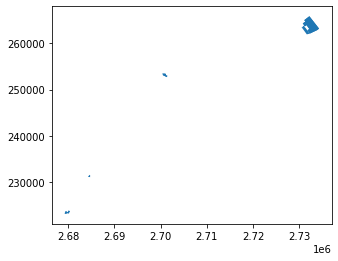

In [134]:
deplandrecycling_junk.plot()

### One Hot Encoding the DEP Land Recycling Data

In [135]:
depland_1he = pd.get_dummies(deplandrecycling_junk[["DEP_land_media"]]).reset_index().drop("index", axis=1)
depland_1he

,DEP_land_media_GROUNDWATER MEDIA,DEP_land_media_SOIL MEDIA
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0


In [136]:
tmp_ = deplandrecycling_junk[["parcel_full", "DEP_landrecycling"]].reset_index().drop("index", axis=1).join(depland_1he)
tmp_.shape

(11, 4)

In [137]:
depland_ohe = tmp_.groupby("parcel_full").max()

In [138]:
depland_ohe

,DEP_landrecycling,DEP_land_media_GROUNDWATER MEDIA,DEP_land_media_SOIL MEDIA
parcel_full,,,
009S060032,1,1,0
009S060043,1,1,0
038N230027,1,0,1
038N230029,1,0,1
038N230034,1,0,1
038N230035,1,0,1
047S200080,1,1,1
136N100072,1,1,1
136N100088,1,0,1


## Philly L&I Violations

In [15]:
violations = gpd.GeoDataFrame.from_file("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/JunkyardViolations_OHE.geojson")

In [67]:
violations.head()

,parcel_full,map_section,business_count,caserespon_AUDITS AND INVESTIGATIONS BUILDING CERTS,caserespon_BU,caserespon_BUILDING COURTS,caserespon_BUILDING INVESTIGATOR,caserespon_CI,caserespon_CLIP,caserespon_CLIP - VACANT LOT INVESTIGATOR,...,violatio_1_WASTE CANS,violatio_1_WASTE CANS\r\n,violatio_1_WASTE HANDLING\r\n,violatio_1_WASTE MATERIAL,violatio_1_WASTE MATERIAL\r\n,violatio_1_WELDING-PERMIT REQ?D,violatio_1_WET CHEMICAL SYSTEM TEST,violatio_1_WET CHEMICAL SYSTEM TEST\r\n,violatio_1_WORKING SPACE/CLEARANCE,geometry
0,004N240112,004N24,1,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2690335.69793 240461.36687, 2690321...."
1,009S060029,009S06,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2684793.81019 231346.35919, 2684722...."
2,009S060032,009S06,1,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2684634.99191 231397.72392, 2684640...."
3,009S060037,009S06,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2684793.81019 231346.35919, 2684722...."
4,009S060043,009S06,1,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2684634.99191 231397.72392, 2684708...."


In [66]:
violations.describe()

,business_count,caserespon_AUDITS AND INVESTIGATIONS BUILDING CERTS,caserespon_BU,caserespon_BUILDING COURTS,caserespon_BUILDING INVESTIGATOR,caserespon_CI,caserespon_CLIP,caserespon_CLIP - VACANT LOT INVESTIGATOR,caserespon_CODE ENFORCEMENT COURTS,caserespon_CODE ENFORCEMENT INVESTIGATOR,...,violatio_1_WASTE ACCUMULATION PROHIBITED\r\n,violatio_1_WASTE CANS,violatio_1_WASTE CANS\r\n,violatio_1_WASTE HANDLING\r\n,violatio_1_WASTE MATERIAL,violatio_1_WASTE MATERIAL\r\n,violatio_1_WELDING-PERMIT REQ?D,violatio_1_WET CHEMICAL SYSTEM TEST,violatio_1_WET CHEMICAL SYSTEM TEST\r\n,violatio_1_WORKING SPACE/CLEARANCE
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2.220238,0.089286,0.500000,0.011905,0.047619,4.827381,0.380952,0.113095,0.071429,1.589286,...,0.005952,0.071429,0.041667,0.023810,0.184524,0.023810,0.029762,0.005952,0.005952,0.023810
std,2.703791,0.545316,1.997004,0.108782,0.324813,7.168625,1.197850,0.551814,0.730609,3.421192,...,0.077152,0.258309,0.200424,0.152911,0.497176,0.152911,0.170438,0.077152,0.077152,0.152911
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26.000000,4.000000,11.000000,1.000000,3.000000,36.000000,8.000000,4.000000,9.000000,24.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
#forgot and don't need map section here
violations.drop(columns=("map_section"), inplace=True)

In [152]:
violations.drop(columns=("geometry"), inplace=True)

In [153]:
violations.head()

,parcel_full,business_count,caserespon_AUDITS AND INVESTIGATIONS BUILDING CERTS,caserespon_BU,caserespon_BUILDING COURTS,caserespon_BUILDING INVESTIGATOR,caserespon_CI,caserespon_CLIP,caserespon_CLIP - VACANT LOT INVESTIGATOR,caserespon_CODE ENFORCEMENT COURTS,...,violatio_1_WASTE ACCUMULATION PROHIBITED\r\n,violatio_1_WASTE CANS,violatio_1_WASTE CANS\r\n,violatio_1_WASTE HANDLING\r\n,violatio_1_WASTE MATERIAL,violatio_1_WASTE MATERIAL\r\n,violatio_1_WELDING-PERMIT REQ?D,violatio_1_WET CHEMICAL SYSTEM TEST,violatio_1_WET CHEMICAL SYSTEM TEST\r\n,violatio_1_WORKING SPACE/CLEARANCE
0,004N240112,1,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,009S060029,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,009S060032,1,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,009S060037,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,009S060043,1,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Combining the Data

Need to combine:

*  Business Licenses (with parcel and geometry): licenses
*  Water: depwater_junk
*  Land: depland_ohe
*  Violations: violations
*  Fire: junkyardfires




### 1. Business Licenses + Water

In [156]:
licensewater = licenses.merge(depwater_junk, on="parcel_full", how="left")

In [157]:
licensewater

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,zip_19153-3507,zip_19153-3508,zip_19153-3513,zip_19153-3516,zip_19153-3522,zip_19153-3524,zip_19153-3529,zip_19153-3588,geometry,DEP_water
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",1.0
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2678435.960 218926.501, 2678379.218 ...",NaN
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",1.0
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2680829.298 223301.310, 2680808.700 ...",NaN
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2680825.903 223299.337, 2680819.922 ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,009S060032,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2684634.992 231397.724, 2684640.581 ...",NaN
164,111N220010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2727858.623 261131.420, 2727876.458 ...",NaN
165,047S200080,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2680390.397 223711.413, 2680288.056 ...",NaN
166,047S200071,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2679266.293 223243.072, 2679413.183 ...",NaN


### 2. License Water + Land



In [158]:
licwaterland = licensewater.merge(depland_1he, on="parcel_full", how="left")

In [159]:
licwaterland

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,zip_19153-3516,zip_19153-3522,zip_19153-3524,zip_19153-3529,zip_19153-3588,geometry,DEP_water,DEP_landrecycling,DEP_land_media_GROUNDWATER MEDIA,DEP_land_media_SOIL MEDIA
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",1.0,NaN,NaN,NaN
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2678435.960 218926.501, 2678379.218 ...",NaN,NaN,NaN,NaN
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",1.0,NaN,NaN,NaN
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2680829.298 223301.310, 2680808.700 ...",NaN,NaN,NaN,NaN
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2680825.903 223299.337, 2680819.922 ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,009S060032,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2684634.992 231397.724, 2684640.581 ...",NaN,1.0,1.0,0.0
164,111N220010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2727858.623 261131.420, 2727876.458 ...",NaN,NaN,NaN,NaN
165,047S200080,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2680390.397 223711.413, 2680288.056 ...",NaN,1.0,1.0,1.0
166,047S200071,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2679266.293 223243.072, 2679413.183 ...",NaN,NaN,NaN,NaN


### License Water Land + Violations

In [160]:
licwaterlandvi = licwaterland.merge(violations, on="parcel_full", how="left")

In [161]:
licwaterlandvi

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,violatio_1_WASTE ACCUMULATION PROHIBITED\r\n,violatio_1_WASTE CANS,violatio_1_WASTE CANS\r\n,violatio_1_WASTE HANDLING\r\n,violatio_1_WASTE MATERIAL,violatio_1_WASTE MATERIAL\r\n,violatio_1_WELDING-PERMIT REQ?D,violatio_1_WET CHEMICAL SYSTEM TEST,violatio_1_WET CHEMICAL SYSTEM TEST\r\n,violatio_1_WORKING SPACE/CLEARANCE
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,009S060032,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,111N220010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,047S200080,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
166,047S200071,5,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


### License Water Land Violations Fire

In [179]:
junkyardfire_all = licwaterlandvi.merge(junkyardfires, on="parcel_full", how="left")

In [180]:
junkyardfire_all

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,violatio_1_WASTE CANS,violatio_1_WASTE CANS\r\n,violatio_1_WASTE HANDLING\r\n,violatio_1_WASTE MATERIAL,violatio_1_WASTE MATERIAL\r\n,violatio_1_WELDING-PERMIT REQ?D,violatio_1_WET CHEMICAL SYSTEM TEST,violatio_1_WET CHEMICAL SYSTEM TEST\r\n,violatio_1_WORKING SPACE/CLEARANCE,Fire
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,009S060032,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
164,111N220010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
165,047S200080,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NaN
166,047S200071,5,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,NaN


In [182]:
#just making sure I have my geometry!
junkyardfire_all["geometry"]

0      POLYGON ((2679160.849 219790.732, 2679137.703 ...
1      POLYGON ((2678435.960 218926.501, 2678379.218 ...
2      POLYGON ((2679159.954 219790.563, 2679136.835 ...
3      POLYGON ((2680829.298 223301.310, 2680808.700 ...
4      POLYGON ((2680825.903 223299.337, 2680819.922 ...
                             ...                        
163    POLYGON ((2684634.992 231397.724, 2684640.581 ...
164    POLYGON ((2727858.623 261131.420, 2727876.458 ...
165    POLYGON ((2680390.397 223711.413, 2680288.056 ...
166    POLYGON ((2679266.293 223243.072, 2679413.183 ...
167    POLYGON ((2690335.698 240461.367, 2690321.702 ...
Name: geometry, Length: 168, dtype: geometry

## Filling Nas with 0

In [223]:
junkyardfire_all = junkyardfire_all.fillna(0)

In [243]:
junkyardfire_all.describe()

,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,map_section_029S07,...,violatio_1_WASTE CANS,violatio_1_WASTE CANS\r\n,violatio_1_WASTE HANDLING\r\n,violatio_1_WASTE MATERIAL,violatio_1_WASTE MATERIAL\r\n,violatio_1_WELDING-PERMIT REQ?D,violatio_1_WET CHEMICAL SYSTEM TEST,violatio_1_WET CHEMICAL SYSTEM TEST\r\n,violatio_1_WORKING SPACE/CLEARANCE,Fire
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,3.440476,0.005952,0.023810,0.005952,0.005952,0.005952,0.011905,0.005952,0.005952,0.005952,...,0.071429,0.041667,0.023810,0.184524,0.023810,0.029762,0.005952,0.005952,0.023810,0.035714
std,1.588516,0.077152,0.152911,0.077152,0.077152,0.077152,0.108782,0.077152,0.077152,0.077152,...,0.258309,0.200424,0.152911,0.497176,0.152911,0.170438,0.077152,0.077152,0.152911,0.186132
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Running the Model!

## Isolate Target Variable (Fires) and Endogenous Variables

In [224]:
y = junkyardfire_all["Fire"].values

In [225]:
X = junkyardfire_all.drop("Fire", axis=1)

In [226]:
#realized I should drop geometry!
X = X.drop("geometry", axis=1)

In [227]:
X = X.drop("parcel_full", axis=1)

In [228]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Columns: 547 entries, licensetype_count to violatio_1_WORKING SPACE/CLEARANCE
dtypes: float64(4), int64(543)
memory usage: 719.2 KB


In [229]:
X.shape

(168, 547)

In [230]:
print("number of infinite values:", (np.isinf(X)).sum().sum())

number of infinite values: 0


In [231]:
print("number of infinite values:", (np.isinf(y)).sum().sum())

number of infinite values: 0


In [232]:
print("there are {} missing values in the X data".format(X.isnull().sum().sum()))

there are 0 missing values in the X data


## Split to Train Test

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 547), (51, 547), (117,), (51,))

In [235]:
from sklearn import tree

In [242]:
clf = tree.DecisionTreeClassifier(max_depth=7, random_state=26)
clf.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf.score(X_train, y_train)))

accuracy on training data 1.0


In [238]:
y.max()

1.0

In [239]:
y.min()

0.0

accuracy on training data 1.0
